In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "5,6,7"

In [3]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mediapy as media
import random
import sys
import torch

from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe = pipe.to("cuda")

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.1+cu121 with CUDA 1201 (you have 2.0.1)
    Python  3.9.18 (you have 3.9.18)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/ec/58/ec5823aff25e15026ef8f9df8feca34db6cd34114209b70c6e3f757b36f7ea6a/48fa46161a745f48d4054df3fe13804ee255486bca893403b60373c188fd1bdb?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27diffusion_pytorch_model.fp16.safetensors%3B+filename%3D%22diffusion_pytorch_model.fp16.safetensors%22%3B&Expires=1702555392&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMjU1NTM5Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2VjLzU4L2VjNTgyM2FmZjI1ZTE1MDI2ZWY4ZjlkZjhmZWNhMzRkYjZjZDM0MTE0MjA5YjcwYzZlM2Y3NTdiMzZmN2VhNmEvNDhmYTQ2MTYxYTc0NWY0OGQ0MDU0ZGYzZmUxMzgwNGVlMjU1NDg2YmNhODkzNDAzYjYwMzczYzE4OGZkMWJkYj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=W6zGmNjQKzGkbqkjWRpiNgF9hRx3qDTAU-5%7EEmGjwPt7pL8ervanXlDaFaCUcPOwec9oTQQQ1QWNN0dl-SfsJ-KSAOquJKZN1qOBA9bepbP3FtexVJ-f-i6vtxxcxuCuPlXjuCWYyvdCrOvIJst0v1oXmFokOtaA207OZQGagpPGgZuR0tO1m8UUHDG

diffusion_pytorch_model.fp16.safetensors:  85%|########4 | 4.34G/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a photo of Korean boy wearing black-and-white strip long sleeve in the cafe
Seed:	4753155864184430956


""

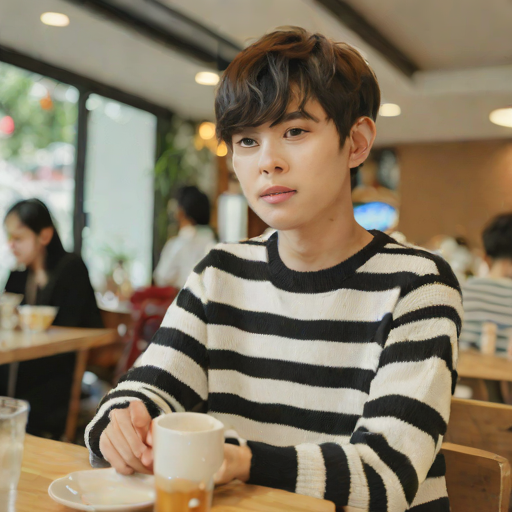

In [5]:
prompt = "a photo of Korean boy wearing black-and-white strip long sleeve in the cafe"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")